# Import data from image:

In [3]:
import numpy as np
import matplotlib as mlt
from matplotlib import pyplot as plt
from PIL import Image
import skimage.transform
import random
import math
import time
import os

add_1 = os.path.join(os.getcwd(), "data", "sample1.jpg")
add_2 = os.path.join(os.getcwd(), "data", "sample6.jpg")
add_3 = os.path.join(os.getcwd(), "data", "sample3.jpg")
image1=Image.open(add_1)#binary image
image2=Image.open(add_2)#colorful image(RGB)
image3=Image.open(add_3)#binary image

    100% |████████████████████████████████| 993kB 8.4MB/s 


## Define the function to calculate the PSNR for binary images and colored image cases:

In [0]:
import numpy 
import math
import cv2
def psnr1(img1, img2):# for binary images cases
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    else:
      
        PIXEL_MAX = 1.0
        return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def psnr255(img1, img2):# for colored image case
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    else:
        PIXEL_MAX = 255
        return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))



## The Binary Images cases:

# Adding noise into binary images:

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


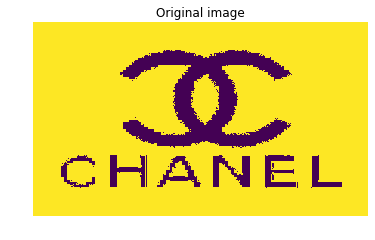

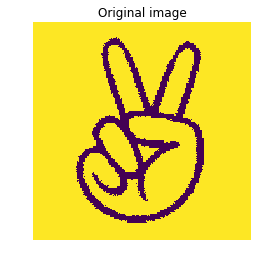

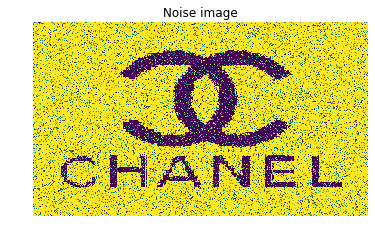

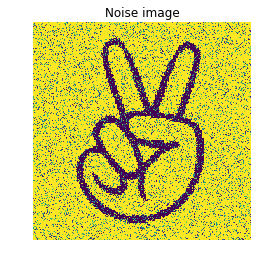

In [5]:
rand=0.2#percent of noise pixels in all pixels.

image1=np.asarray(image1)
image3=np.asarray(image3)

image_new1=skimage.transform.resize(image1[:,:,0], (500,866))
image_new3=skimage.transform.resize(image3[:,:,0], (300,300))

original_image1=image_new1
original_image3=image_new3

noise_image1=image_new1
noise_image3=image_new3


[l1,w1]=image_new1.shape
[l3,w3]=image_new3.shape

for m in range(0,l1):
    for n in range(0,w1):
        if image_new1[m,n]==0:
            original_image1[m,n]=0
        else:
            original_image1[m,n]=1
plt.imshow(original_image1)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')
plt.show()

for m in range(0,l3):
    for n in range(0,w3):
        if image_new3[m,n]==0:
            original_image3[m,n]=0
        else:
            original_image3[m,n]=1
plt.imshow(original_image3)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')
plt.show()


noise1=np.random.randint(0, 101, (l1, w1))
noise3=np.random.randint(0, 101, (l3, w3))

noise_image1=np.copy(original_image1)
noise_image3=np.copy(original_image3)

for m in range(0,l1):
    for n in range(0,w1):
        if noise1[m,n]<101*rand:
            random_number=random.uniform(0,1)
            noise_image1[m,n]=random_number
        else:
            noise_image1[m,n]=noise_image1[m,n]
plt.imshow(noise_image1)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')
plt.show()

for m in range(0,l3):
    for n in range(0,w3):
        if noise3[m,n]<101*rand:
            random_number=random.uniform(0,1)
            noise_image3[m,n]=random_number
        else:
            noise_image3[m,n]=noise_image3[m,n]
plt.imshow(noise_image3)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')
plt.show()



# The code for comparing the result de-noised images from MRF under Gibbs Sampling and that under Modified ICM:

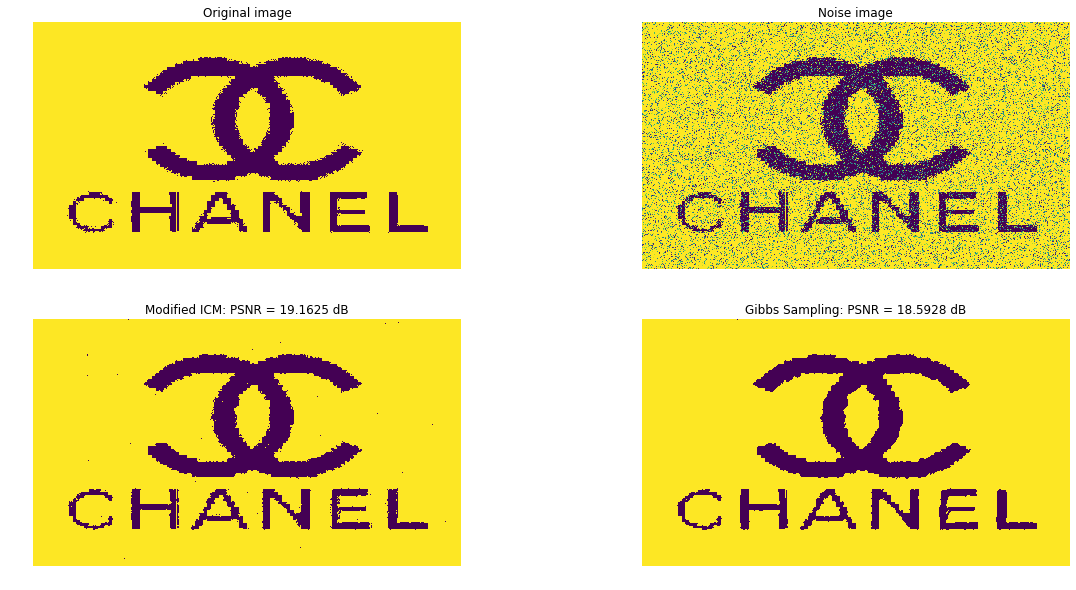

In [6]:
lamda_g=1# Weight parameter for G
lamda_f=1# Weight parameter for F
n1=2 # t_{D}
n2=1 # t_{G}
n3=1 # t_{F}

w1=1 # Weight parameter for difference between Y[i,j] and its neighbors in same hidden layer.
w2=1 # Weight parameter for difference between Y[i,j] and the  corresponded x[i,j].

plt.figure(figsize=[20,10])

plt.subplot(2,2,1)
plt.imshow(original_image1)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(noise_image1)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')


#Modified ICM:

imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.


for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand_non[m,n]
            a_neigh=np.array([imag_expand_non[m,n-1],imag_expand_non[m,n+1],imag_expand_non[m-1,n],imag_expand_non[m+1,n],imag_expand_non[m+1,n-1],imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1],imag_expand_non[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand_non[m,n-1]-imag_expand_non[m,n+1],imag_expand_non[m-1,n]-imag_expand_non[m+1,n],imag_expand_non[m-1,n-1]-imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1]-imag_expand_non[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand_non[m,n-1]+imag_expand_non[m,n+1],imag_expand_non[m-1,n]+imag_expand_non[m+1,n],imag_expand_non[m-1,n-1]+imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1]+imag_expand_non[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1


imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(2,2,3)
plt.imshow(imag_expand_m)
plt.grid(None)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.axis('off')


#Gibbs Sampling:


imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.


for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1
imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(2,2,4)
plt.imshow(imag_expand_m)
plt.grid(None)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d) 
plt.axis('off')
plt.show()



# The code for comparing the result de-noised images from MRF under Gibbs Sampling and that under Modified ICM. Here, we use the new type binary image:

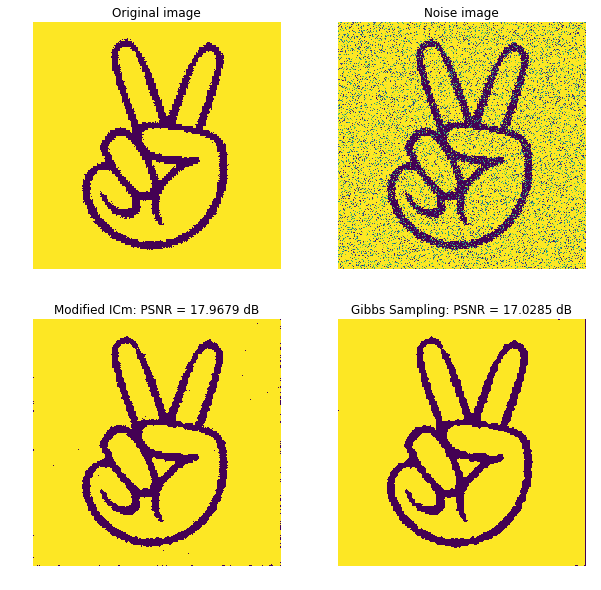

In [8]:
lamda_g=1
lamda_f=1
n1=2
n2=1
n3=1

w1=1
w2=1

plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
plt.imshow(original_image3)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')


plt.subplot(2,2,2)
plt.imshow(noise_image3)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')


#Modified ICM:


imag=noise_image3
#print(imag[1,:])
original_imag=original_image3
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.

for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand_non[m,n]
            a_neigh=np.array([imag_expand_non[m,n-1],imag_expand_non[m,n+1],imag_expand_non[m-1,n],imag_expand_non[m+1,n],imag_expand_non[m+1,n-1],imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1],imag_expand_non[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand_non[m,n-1]-imag_expand_non[m,n+1],imag_expand_non[m-1,n]-imag_expand_non[m+1,n],imag_expand_non[m-1,n-1]-imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1]-imag_expand_non[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand_non[m,n-1]+imag_expand_non[m,n+1],imag_expand_non[m-1,n]+imag_expand_non[m+1,n],imag_expand_non[m-1,n-1]+imag_expand_non[m+1,n+1],imag_expand_non[m-1,n+1]+imag_expand_non[m+1,n-1]])/2
     
            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1
imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image3,imag_expand_m)
plt.subplot(2,2,3)
plt.imshow(imag_expand_m)
plt.title('Modified ICm: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')



#Gibbs Sampling:


imag=noise_image3
#print(imag[1,:])
original_imag=original_image3
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.




for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3+lamda_g*abs(np.mean(a_neigh)-1)**n2
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3+lamda_g*abs(np.mean(a_neigh)-0)**n2
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1
imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image3,imag_expand_m)
plt.subplot(2,2,4)
plt.imshow(imag_expand_m)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')
plt.show()

#Compare the performances of MRF models based on Gibbs Sampling by feeding it with different parameter settings:

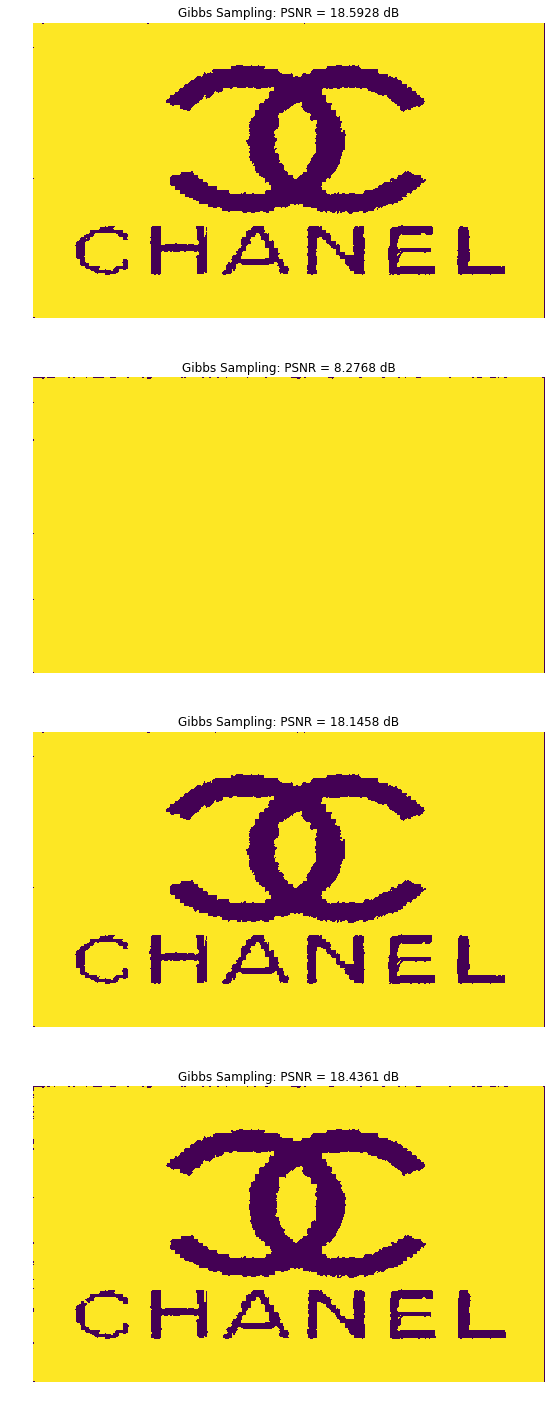

In [7]:
#Case 1:
lamda_g=1
lamda_f=1
n1=2
n2=1
n3=1

w1=1
w2=1



imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.

plt.figure(figsize=[10,25])
for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1


imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(4,1,1)
plt.imshow(imag_expand_m)
plt.grid(None)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.axis('off')


#Case 2:
lamda_g=1
lamda_f=1
n1=2
n2=1
n3=1

w1=1
w2=0




imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.


for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1


imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(4,1,2)
plt.imshow(imag_expand_m)
plt.grid(None)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.axis('off')


#Case 3:
lamda_g=20
lamda_f=1
n1=2
n2=3
n3=1

w1=1
w2=1



imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.


for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0
            else:
                imag_expand[m,n]=1



imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(4,1,3)
plt.imshow(imag_expand_m)

plt.grid(None)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.axis('off')


#Case 4:
lamda_g=1
lamda_f=20
n1=2
n2=1
n3=4

w1=1
w2=1



imag=noise_image1
#print(imag[1,:])
original_imag=original_image1
[l,w]=imag.shape
imag_expand=np.lib.pad(imag,((1,1),(1,1)),'constant',constant_values=(0))
original_imag=np.lib.pad(original_imag,((1,1),(1,1)),'constant',constant_values=(0))
#print(imag_expand)
imag_expand_unchange=imag_expand
imag_expand_non=np.copy(imag_expand)
  
number_iterations=1#number of circles for de-noising image.


for i in range(0,number_iterations):
    for m in range(1,l+1):
        for n in range(1,w+1):
            a=imag_expand[m,n]
            a_neigh=np.array([imag_expand[m,n-1],imag_expand[m,n+1],imag_expand[m-1,n],imag_expand[m+1,n],imag_expand[m+1,n-1],imag_expand[m+1,n+1],imag_expand[m-1,n+1],imag_expand[m-1,n+1]])
            a_neigh_list=abs(np.array([imag_expand[m,n-1]-imag_expand[m,n+1],imag_expand[m-1,n]-imag_expand[m+1,n],imag_expand[m-1,n-1]-imag_expand[m+1,n+1],imag_expand[m-1,n+1]-imag_expand[m+1,n-1]]))
            a_neigh_list_ave=np.array([imag_expand[m,n-1]+imag_expand[m,n+1],imag_expand[m-1,n]+imag_expand[m+1,n],imag_expand[m-1,n-1]+imag_expand[m+1,n+1],imag_expand[m-1,n+1]+imag_expand[m+1,n-1]])/2

            E1=w2*abs(a-1)**n1+w1*abs(np.sum((a_neigh-1)**n1))+lamda_g*abs(np.mean(a_neigh)-1)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-1)**n3
            E0=w2*abs(a-0)**n1+w1*abs(np.sum((a_neigh-0)**n1))+lamda_g*abs(np.mean(a_neigh)-0)**n2+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-0)**n3
            if E1>E0:
                imag_expand[m,n]=0

            else:
                imag_expand[m,n]=1


imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr1(original_image1,imag_expand_m)
plt.subplot(4,1,4)
plt.imshow(imag_expand_m)
plt.grid(None)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.axis('off')
plt.show()






# The Colored Image case:

# Define the function for adding the outer layer for each image layer from the sample image:

In [0]:
from PIL import Image
def pad_with(vector, pad_width, iaxis, kwargs):
  
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

#Adding noise in sample colored image:

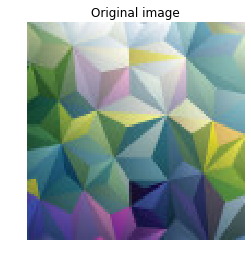

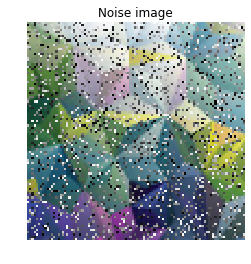

In [10]:
rand=0.07#percent of noise pixel variables in each image layer.

image2=np.asarray(image2)
plt.imshow(image2)
image_new2=np.copy(image2)

original_image2=image_new2

noise_image2=image_new2


[l2,w2,h2]=image_new2.shape

plt.imshow(original_image2)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')
plt.show()



noise2=np.random.randint(0, 101, (l2, w2, h2))

noise_image2=np.copy(original_image2)

for m in range(0,l2):
    for n in range(0,w2):
        for h in range(0,h2):
            if noise2[m,n,h]<101*rand:
                random_number=round(random.uniform(0,255))

                #print(random_number)
                noise_image2[m,n]=random_number
            else:
                noise_image2[m,n]=noise_image2[m,n]
plt.imshow(noise_image2)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')
plt.show()



# The code for comparing the result de-noised images from MRF under Gibbs Sampling and that under Modified ICM:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in ubyte_scalars


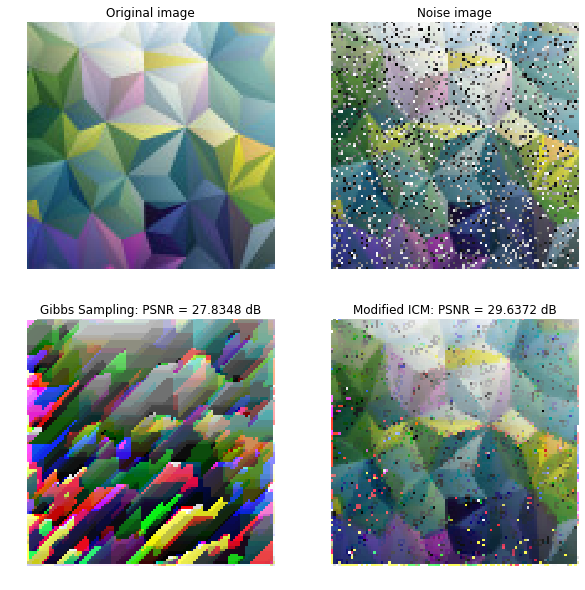

In [15]:
plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
plt.imshow(original_image2)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(noise_image2)
plt.title('Noise image')
plt.grid(None) 
plt.axis('off')


#Gibbs Sampling:


lamda_g=0.5 # Weight parameter for G
lamda_f=0.5 # Weight parameter for F
n1=1 # t_{D}
n2=1 # t_{G}
n3=1 # t_{F}

w1=1 # Weight parameter for difference between Y[i,j] and its neighbors in same hidden layer.
w2=0 # Weight parameter for difference between Y[i,j] and the corresponded x[i,j].



imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand[m,n,s]
                a_neigh=np.array([imag_expand[m,n-1,s],imag_expand[m,n+1,s],imag_expand[m-1,n,s],imag_expand[m+1,n,s],imag_expand[m+1,n-1,s],imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s],imag_expand[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand[m,n-1,s]-imag_expand[m,n+1,s],imag_expand[m-1,n,s]-imag_expand[m+1,n,s],imag_expand[m-1,n-1,s]-imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s]-imag_expand[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand[m,n-1,s]+imag_expand[m,n+1,s],imag_expand[m-1,n,s]+imag_expand[m+1,n,s],imag_expand[m-1,n-1,s]+imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s]+imag_expand[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,3)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.imshow(imag_expand_m)
plt.grid(None) 
plt.axis('off')



#Midified ICM:


lamda_g=0.5
lamda_f=0.5
n1=1
n2=1
n3=1

w1=1
w2=0


imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand_non[m,n,s]
                a_neigh=np.array([imag_expand_non[m,n-1,s],imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s],imag_expand_non[m+1,n,s],imag_expand_non[m+1,n-1,s],imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s],imag_expand_non[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand_non[m,n-1,s]-imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]-imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]-imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]-imag_expand_non[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand_non[m,n-1,s]+imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]+imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]+imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]+imag_expand_non[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
noise_image111=np.copy(imag_expand_m)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,4)
plt.imshow(imag_expand_m)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')
plt.show()

# The code for output de-noised image from Gibbs Sampling by changing $w_{2}=1$ from initial parameter setting:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars


(-0.5, 99.5, 99.5, -0.5)

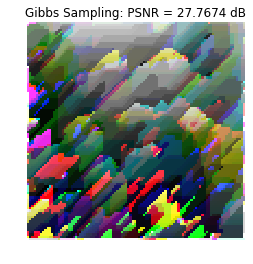

In [13]:
lamda_g=0.5
lamda_f=0.5
n1=1
n2=1
n3=1

w1=1
w2=1



imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)

for i in range(0,number_iterations):
    for s in range(0,h):
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand[m,n,s]
                a_neigh=np.array([imag_expand[m,n-1,s],imag_expand[m,n+1,s],imag_expand[m-1,n,s],imag_expand[m+1,n,s],imag_expand[m+1,n-1,s],imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s],imag_expand[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand[m,n-1,s]-imag_expand[m,n+1,s],imag_expand[m-1,n,s]-imag_expand[m+1,n,s],imag_expand[m-1,n-1,s]-imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s]-imag_expand[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand[m,n-1,s]+imag_expand[m,n+1,s],imag_expand[m-1,n,s]+imag_expand[m+1,n,s],imag_expand[m-1,n-1,s]+imag_expand[m+1,n+1,s],imag_expand[m-1,n+1,s]+imag_expand[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.title('Gibbs Sampling: PSNR = %.4f dB'%d)
plt.imshow(imag_expand_m)
plt.grid(None) 
plt.axis('off')



# The code for comparing the performances of various de-noising methods with MRF model under Modified ICM:

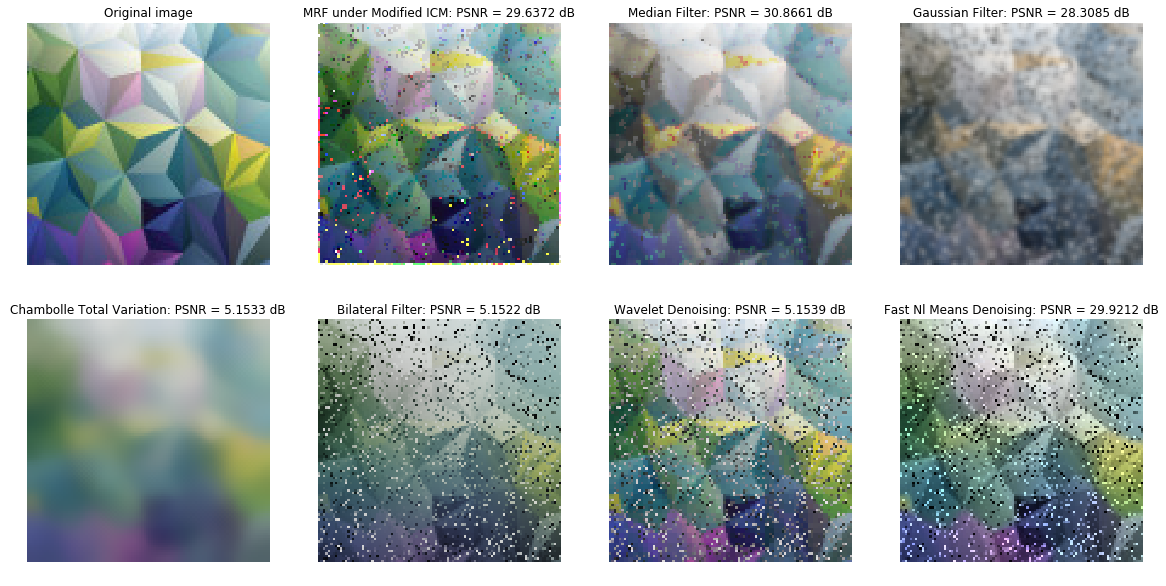

In [16]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
import cv2
from scipy import ndimage

#Case 1: MRF under Modified ICM
d=psnr255(noise_image111,original_image2)
plt.figure(figsize=[20,10])
plt.subplot(2,4,2)
plt.imshow(noise_image111)
plt.title('MRF under Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')

#Case 2: Original image
plt.subplot(2,4,1)
plt.imshow(original_image2)
plt.title('Original image')
plt.grid(None) 
plt.axis('off')


#Case 3: Gaussian Filter
noise_image28 = ndimage.gaussian_filter(noise_image2, 1)
d=psnr255(noise_image28,original_image2)
plt.subplot(2,4,4)
plt.imshow(noise_image28)
plt.title('Gaussian Filter: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')


#Case 4: Median Filter
noise_image29 = ndimage.median_filter(noise_image2, 3)
d=psnr255(noise_image29,original_image2)
plt.subplot(2,4,3)
plt.imshow(noise_image29)
plt.title('Median Filter: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')


#Case 5: Chambolle Total Variation
noise_image21=denoise_tv_chambolle(noise_image2, weight=1, multichannel=True)
d=psnr255(noise_image21,original_image2)
plt.subplot(2,4,5)
plt.imshow(noise_image21)
plt.title('Chambolle Total Variation: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')
#plt.imshow(denoise_bilateral(noise_image2, sigma_color=0.05, sigma_spatial=15,multichannel=True))


#Case 6: Bilateral Filter
noise_image23=denoise_bilateral(noise_image2, sigma_color=0.1, sigma_spatial=15,
                multichannel=True)
d=psnr255(noise_image23,original_image2)
plt.subplot(2,4,6)
plt.imshow(noise_image23)
plt.title('Bilateral Filter: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')


#Case 7: Wavelet Denoising
noise_image30 = denoise_wavelet(noise_image2, multichannel=True, convert2ycbcr=False)
d=psnr255(noise_image30,original_image2)
plt.subplot(2,4,7)
plt.imshow(noise_image30)
plt.title('Wavelet Denoising: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')



#Case 8: Fast Nl Means Denoising
noise_image26 = cv2.fastNlMeansDenoisingColored(noise_image2, None,10,10,7,21)
d=psnr255(noise_image26,original_image2)
plt.subplot(2,4,8)
plt.imshow(noise_image26)
plt.title('Fast Nl Means Denoising: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')



plt.show()

# Compare the performances of MRF models based on Modified ICM by feeding it with different parameter settings:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:147: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:200: RuntimeWarning: overflow encountered in ubyte_scalars


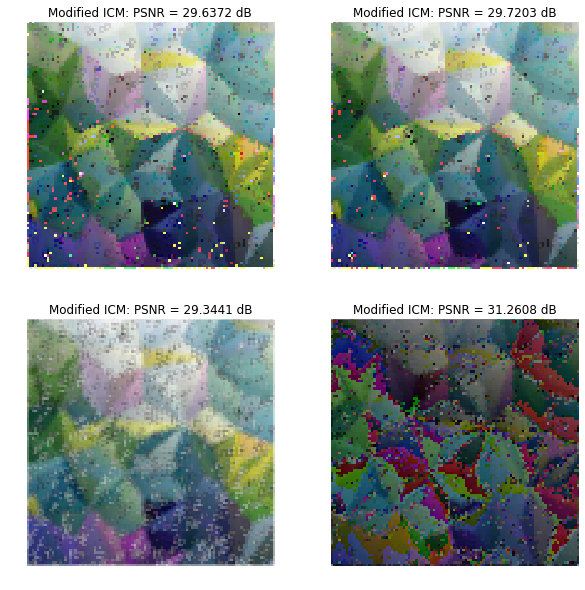

In [17]:
plt.figure(figsize=[10,10])

# Case 1:
lamda_g=0.5
lamda_f=0.5
n1=1
n2=1
n3=1

w1=1
w2=0


imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
          for n in range(1,w+1):
            a=imag_expand_non[m,n,s]
            a_neigh=np.array([imag_expand_non[m,n-1,s],imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s],imag_expand_non[m+1,n,s],imag_expand_non[m+1,n-1,s],imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s],imag_expand_non[m-1,n+1,s]])
            a_neigh_list=abs(np.array([imag_expand_non[m,n-1,s]-imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]-imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]-imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]-imag_expand_non[m+1,n-1,s]]))
            a_neigh_list_ave=np.array([imag_expand_non[m,n-1,s]+imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]+imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]+imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]+imag_expand_non[m+1,n-1,s]])/2
            for i1 in range(0,256):
                E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
            location=round(np.where(E==np.min(E))[0][0])
            imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,1)
plt.imshow(imag_expand_m)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')



#Case 2:
lamda_g=0.5
lamda_f=0.5
n1=1
n2=1
n3=1

w1=1
w2=1


imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand_non[m,n,s]
                a_neigh=np.array([imag_expand_non[m,n-1,s],imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s],imag_expand_non[m+1,n,s],imag_expand_non[m+1,n-1,s],imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s],imag_expand_non[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand_non[m,n-1,s]-imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]-imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]-imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]-imag_expand_non[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand_non[m,n-1,s]+imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]+imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]+imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]+imag_expand_non[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,2)
plt.imshow(imag_expand_m)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')


#Case 3:
lamda_g=2
lamda_f=0.5
n1=1
n2=2
n3=1

w1=1
w2=0


imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand_non[m,n,s]
                a_neigh=np.array([imag_expand_non[m,n-1,s],imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s],imag_expand_non[m+1,n,s],imag_expand_non[m+1,n-1,s],imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s],imag_expand_non[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand_non[m,n-1,s]-imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]-imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]-imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]-imag_expand_non[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand_non[m,n-1,s]+imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]+imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]+imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]+imag_expand_non[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,3)
plt.imshow(imag_expand_m)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')


#Case 4:
lamda_g=0.5
lamda_f=5
n1=1
n2=1
n3=2

w1=1
w2=0


imag=noise_image2
#print(imag[1,:])
original_imag=original_image2
[l,w,h]=imag.shape
imag_expand=np.zeros([l+2,w+2,h],dtype=np.uint8)
for i in range(0,h):
    imag_expand[:,:,i]=np.pad(imag[:,:,i],1, pad_with, padder=255)

imag_expand_non=np.copy(imag_expand)
#print(imag_expand)

number_iterations=1#number of circles for de-noising image.

p=np.arange(256)
E=np.copy(p)
for i in range(0,number_iterations):
    for s in range(0,h):
    
        for m in range(1,l+1):
          #print(m)
            for n in range(1,w+1):
                a=imag_expand_non[m,n,s]
                a_neigh=np.array([imag_expand_non[m,n-1,s],imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s],imag_expand_non[m+1,n,s],imag_expand_non[m+1,n-1,s],imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s],imag_expand_non[m-1,n+1,s]])
                a_neigh_list=abs(np.array([imag_expand_non[m,n-1,s]-imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]-imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]-imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]-imag_expand_non[m+1,n-1,s]]))
                a_neigh_list_ave=np.array([imag_expand_non[m,n-1,s]+imag_expand_non[m,n+1,s],imag_expand_non[m-1,n,s]+imag_expand_non[m+1,n,s],imag_expand_non[m-1,n-1,s]+imag_expand_non[m+1,n+1,s],imag_expand_non[m-1,n+1,s]+imag_expand_non[m+1,n-1,s]])/2
                for i1 in range(0,256):
                    E[i1]=w2*abs(a-p[i1])**n1+w1*abs(np.sum((a_neigh-p[i1])**n1))+lamda_f*abs(a_neigh_list_ave[np.where(a_neigh_list==np.min(a_neigh_list))[0][0]]-p[i1])**n3+lamda_g*abs(np.mean(a_neigh)-p[i1])**n2
                location=round(np.where(E==np.min(E))[0][0])
                imag_expand[m,n,s]=location

imag_expand_m=np.delete(imag_expand, [0,l+1], axis=0)
imag_expand_m=np.delete(imag_expand_m, [0,w+1], axis=1)
d=psnr255(imag_expand_m, original_image2)
plt.subplot(2,2,4)
plt.imshow(imag_expand_m)
plt.title('Modified ICM: PSNR = %.4f dB'%d)
plt.grid(None) 
plt.axis('off')
plt.show()